## TASK 2 - Titanic Classification

### Build a predictive model to determine the likelihood of survival for passengers on the Titanic using data science techniques in Python

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Load the dataset

In [3]:
data = pd.read_csv("C:/Users/HP/Downloads/Titanic_Dataset.csv")

#### Explore the first few rows of the dataset

In [4]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


#### Check for missing values

In [5]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### Data preprocessing

#### Drop irrelevant columns

In [6]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#### Fill missing values for Age with median

In [7]:
data['Age'].fillna(data['Age'].median(), inplace=True)

#### Fill missing values for Embarked with mode

In [8]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

#### Convert categorical variables to numerical

In [9]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'])

#### Visualizations

#### Plot survival counts

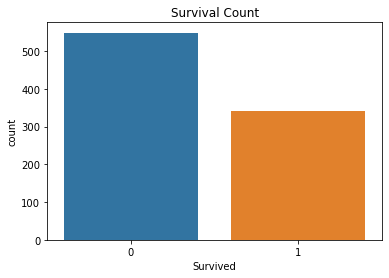

In [10]:
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()

#### Plot survival counts by sex

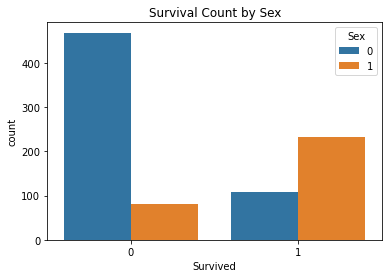

In [11]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival Count by Sex')
plt.show()

#### Plot survival counts by Pclass

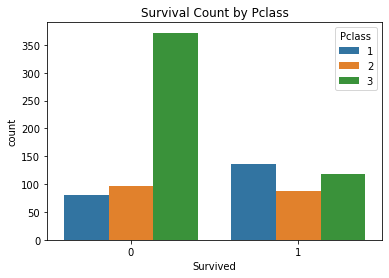

In [12]:
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Survival Count by Pclass')
plt.show()

#### Plot age distribution

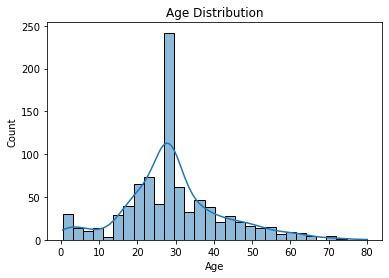

In [13]:
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

#### Plot fare distribution

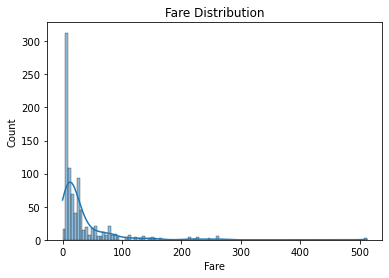

In [14]:
sns.histplot(data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

#### Split the data into features and target variable

In [15]:
X = data.drop('Survived', axis=1)
y = data['Survived']

#### Split data into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Feature scaling

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Model building

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

#### Predictions

In [19]:
y_pred = model.predict(X_test_scaled)

#### Performance evaluation

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8100558659217877


#### Confusion matrix

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[88 17]
 [17 57]]


#### Classification report

In [22]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

